In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
x = df['Species']
print(x)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [8]:
df.rename(columns={"SepalLengthCm":"SLC","SepalWidthCm":"SWC","PetalLengthCm":"PLC","PetalWidthCm":"PWC"}).head()

,Id,SLC,SWC,PLC,PWC,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
x = df["SepalWidthCm"]
print(x.head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: SepalWidthCm, dtype: float64


In [10]:
y = df['Species']
x = df.drop('Species', axis = 1)

In [11]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier


K = []
training = []
test = []
scores = {}

for k in range(11, 81):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [13]:
for keys, values in scores.items():
    print(keys, ':', values)

11 : [0.9904761904761905, 1.0]
12 : [1.0, 1.0]
13 : [0.9809523809523809, 1.0]
14 : [1.0, 1.0]
15 : [0.9904761904761905, 1.0]
16 : [0.9904761904761905, 1.0]
17 : [0.9904761904761905, 1.0]
18 : [0.9904761904761905, 1.0]
19 : [0.9904761904761905, 1.0]
20 : [0.9904761904761905, 1.0]
21 : [0.9714285714285714, 1.0]
22 : [0.9809523809523809, 1.0]
23 : [0.9904761904761905, 1.0]
24 : [0.9809523809523809, 1.0]
25 : [0.9904761904761905, 1.0]
26 : [0.9809523809523809, 1.0]
27 : [0.9904761904761905, 1.0]
28 : [0.9809523809523809, 1.0]
29 : [0.9714285714285714, 1.0]
30 : [0.9714285714285714, 0.9777777777777777]
31 : [0.9714285714285714, 1.0]
32 : [0.9714285714285714, 0.9777777777777777]
33 : [0.9809523809523809, 1.0]
34 : [0.9809523809523809, 1.0]
35 : [0.9809523809523809, 1.0]
36 : [0.9714285714285714, 1.0]
37 : [0.9809523809523809, 0.9777777777777777]
38 : [0.9714285714285714, 1.0]
39 : [0.9809523809523809, 0.9777777777777777]
40 : [0.9714285714285714, 1.0]
41 : [0.9809523809523809, 0.977777777777

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 4  9  5]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       0.80      1.00      0.89        16
Iris-versicolor       1.00      0.50      0.67        18
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.80        45
      macro avg       0.83      0.83      0.79        45
   weighted avg       0.85      0.80      0.78        45



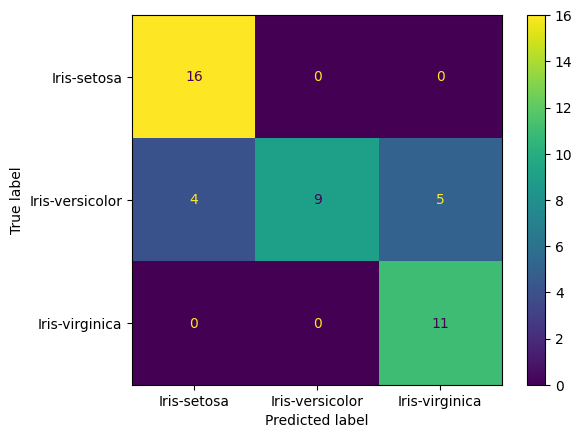

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()